In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
raw_data = pd.read_excel("../../raw/rmssd/Basal v2.xlsx")
raw_data.head(5)

,Unnamed: 0,Unnamed: 1,redcap_repeat_instrument,sex,age,t2m_pre_mean_rr,t2m_pre_rmssd,t2m_pre_sd1,t2m_pre_pns,t2m_pre_mean_hr,...,t2m_pre_lf,t2m_pre_vlf,bp_systolic,bp_diastolic,bp_pam,bp_pp,Weight kg,Height cm,Height mt,imc
0,NaN,NaN,NaN,1.0,75.0,74.8,21.7,274.0,-140.0,80,...,713.0,172.0,108,70,82.666667,38,70.0,160,1.60,27.343750
1,NaN,NaN,NaN,1.0,66.0,95.3,18.8,285.0,-54.0,63,...,226.0,29.0,122,72,88.666667,50,52.0,149,1.49,23.422368
2,NaN,NaN,NaN,2.0,77.0,87.7,11.7,303.0,-105.0,68,...,137.0,9.0,125,85,98.333333,40,81.0,170,1.70,28.027682
3,NaN,NaN,NaN,1.0,77.0,81.9,17.5,376.0,-106.0,73,...,130.0,14.0,126,72,90.000000,54,85.0,160,1.60,33.203125
4,NaN,NaN,NaN,1.0,73.0,84.6,13.6,295.0,-115.0,71,...,66.0,18.0,130,80,96.666667,50,69.0,151,1.51,30.261831


In [3]:
raw_data.shape

(531, 25)

In [4]:
raw_data.dropna().shape

(0, 25)

In [5]:
raw_data.drop(columns=["Unnamed: 0", "Unnamed: 1", "redcap_repeat_instrument"], inplace=True)

In [6]:
raw_data.head(6)

,sex,age,t2m_pre_mean_rr,t2m_pre_rmssd,t2m_pre_sd1,t2m_pre_pns,t2m_pre_mean_hr,t2m_pre_stress,t2m_pre_sd2,t2m_pre_sns,...,t2m_pre_lf,t2m_pre_vlf,bp_systolic,bp_diastolic,bp_pam,bp_pp,Weight kg,Height cm,Height mt,imc
0,1.0,75.0,74.8,21.7,274.0,-140.0,80,149.0,726.0,184.0,...,713.0,172.0,108,70,82.666667,38,70.0,160,1.60,27.343750
1,1.0,66.0,95.3,18.8,285.0,-54.0,63,145.0,715.0,68.0,...,226.0,29.0,122,72,88.666667,50,52.0,149,1.49,23.422368
2,2.0,77.0,87.7,11.7,303.0,-105.0,68,258.0,697.0,276.0,...,137.0,9.0,125,85,98.333333,40,81.0,170,1.70,28.027682
3,1.0,77.0,81.9,17.5,376.0,-106.0,73,249.0,624.0,283.0,...,130.0,14.0,126,72,90.000000,54,85.0,160,1.60,33.203125
4,1.0,73.0,84.6,13.6,295.0,-115.0,71,166.0,705.0,149.0,...,66.0,18.0,130,80,96.666667,50,69.0,151,1.51,30.261831
5,1.0,65.0,129.6,29.8,514.0,156.0,46,141.0,486.0,-71.0,...,69.0,61.0,129,73,91.666667,56,58.0,149,1.49,26.124949


In [7]:
raw_data.columns

Index(['sex', 'age', 't2m_pre_mean_rr', 't2m_pre_rmssd', 't2m_pre_sd1',
       't2m_pre_pns', 't2m_pre_mean_hr', 't2m_pre_stress', 't2m_pre_sd2',
       't2m_pre_sns', 't2m_pre_sdnn', 't2m_pre_hf', 't2m_pre_lf',
       't2m_pre_vlf', 'bp_systolic', 'bp_diastolic', 'bp_pam', 'bp_pp',
       'Weight kg', 'Height cm', 'Height mt', 'imc'],
      dtype='object')

In [8]:
raw_data.dtypes

sex                float64
age                float64
t2m_pre_mean_rr    float64
t2m_pre_rmssd      float64
t2m_pre_sd1        float64
t2m_pre_pns        float64
t2m_pre_mean_hr      int64
t2m_pre_stress     float64
t2m_pre_sd2        float64
t2m_pre_sns        float64
t2m_pre_sdnn       float64
t2m_pre_hf         float64
t2m_pre_lf         float64
t2m_pre_vlf        float64
bp_systolic          int64
bp_diastolic         int64
bp_pam             float64
bp_pp                int64
Weight kg          float64
Height cm            int64
Height mt          float64
imc                float64
dtype: object

In [9]:
raw_data.drop(columns=["Height mt"], inplace=True)

In [10]:
filter_data_values = raw_data[['sex', 'age', 't2m_pre_rmssd', 'bp_systolic', 'bp_diastolic', 'bp_pam', 'bp_pp', 'Weight kg', 'Height cm', 'imc']]

In [11]:
filter_data_values["sex"].value_counts()

1.0    366
2.0    164
Name: sex, dtype: int64

In [12]:
filter_data_values.dropna().shape

(522, 10)

In [13]:
filter_data_values = filter_data_values[:-1]
filter_data_values.fillna(filter_data_values.mean(), inplace=True)

In [14]:
filter_data_values.describe()

,sex,age,t2m_pre_rmssd,bp_systolic,bp_diastolic,bp_pam,bp_pp,Weight kg,Height cm,imc
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,1.309434,70.862264,14.664176,130.256604,77.477358,95.070440,52.779245,75.039434,156.486792,30.713564
std,0.462697,6.247108,8.104527,17.318167,10.144162,11.141434,14.142080,14.026612,8.880259,5.532868
min,1.000000,50.000000,0.500000,80.000000,52.000000,66.000000,16.000000,47.000000,130.000000,18.359375
25%,1.000000,66.000000,9.900000,119.000000,70.250000,87.666667,43.000000,65.125000,150.000000,26.666667
50%,1.000000,71.000000,13.700000,128.500000,77.000000,94.333333,51.000000,72.950000,156.000000,29.733333
75%,2.000000,75.000000,17.900000,140.000000,84.000000,102.000000,61.000000,82.275000,160.000000,33.667215
max,2.000000,89.000000,71.600000,203.000000,115.000000,135.666667,101.000000,120.000000,180.000000,57.074911


In [15]:
filter_data_values.dtypes

sex              float64
age              float64
t2m_pre_rmssd    float64
bp_systolic        int64
bp_diastolic       int64
bp_pam           float64
bp_pp              int64
Weight kg        float64
Height cm          int64
imc              float64
dtype: object

<AxesSubplot: xlabel='sex', ylabel='t2m_pre_rmssd'>

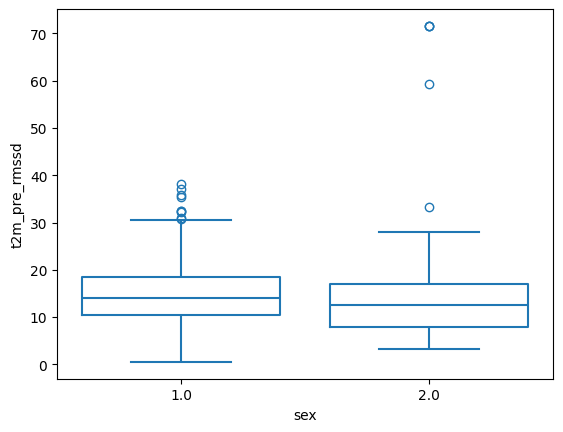

In [16]:
sns.boxplot(data=filter_data_values, y="t2m_pre_rmssd", x="sex", fill=False)

In [17]:
filter_data_values["t2m_pre_rmssd"] = (filter_data_values["t2m_pre_rmssd"] >15).astype(int)

In [18]:
filter_data_values["t2m_pre_rmssd"].value_counts()

0    316
1    214
Name: t2m_pre_rmssd, dtype: int64

In [19]:
response = filter_data_values["t2m_pre_rmssd"]
datos = filter_data_values.drop(columns=["t2m_pre_rmssd"])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(datos, response, test_size=0.1, random_state=42)


In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [22]:
X_train.to_csv("../../process_dataset/rmssd/train_data.csv", index=False)
X_val.to_csv("../../process_dataset/rmssd/val_data.csv", index=False)
X_test.to_csv("../../process_dataset/rmssd/test_data.csv", index=False)

In [23]:
with open("../../process_dataset/rmssd/y_train.npy", 'wb') as doc_export:
    np.save(doc_export, y_train)

In [24]:
with open("../../process_dataset/rmssd/y_val.npy", 'wb') as doc_export:
    np.save(doc_export, y_val)

In [25]:
with open("../../process_dataset/rmssd/y_test.npy", 'wb') as doc_export:
    np.save(doc_export, y_test)

In [26]:
df_counts = pd.DataFrame()
df_counts["y_values"] = y_train

In [27]:
df_counts["y_values"].value_counts()

0    226
1    155
Name: y_values, dtype: int64